# Ensamble de Regresores
1. Preparación de datos
2. División de datos
3. Predictores individuales
4. Bagging
5. Random Forest
6. Boosting
7. Votación "hard"
8. Votación "soft"
9. Stacking
10. Guardamos el mejor modelo


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1. Preparación de datos

In [ ]:
data = pd.read_csv("DATA.csv")
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9322 entries, 0 to 9321
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FechaInicioMes                   9322 non-null   object 
 1   EnglishProductName               9322 non-null   object 
 2   Category                         9322 non-null   object 
 3   Subcategory                      9322 non-null   object 
 4   ListPrice                        9322 non-null   float64
 5   Margin                           9322 non-null   float64
 6   Color                            8260 non-null   object 
 7   Size                             8024 non-null   object 
 8   CalendarYear                     9322 non-null   int64  
 9   MonthNumberOfYear                9322 non-null   int64  
 10  Is_Holiday_Season                9322 non-null   int64  
 11  Product_Age_Months               9322 non-null   int64  
 12  descuento_promedio_m

In [ ]:
#Correccion de tipo de datos
data.drop(columns='FechaInicioMes', inplace=True)
data['EnglishProductName']=data['EnglishProductName'].astype('category')
data['Category']=data['Category'].astype('category')
data['Subcategory']=data['Subcategory'].astype('category')
data['Color']=data['Color'].astype('category')
data['Size']=data['Size'].astype('category')
data['Is_Holiday_Season']=data['Is_Holiday_Season'].astype('boolean')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9322 entries, 0 to 9321
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   EnglishProductName               9322 non-null   category
 1   Category                         9322 non-null   category
 2   Subcategory                      9322 non-null   category
 3   ListPrice                        9322 non-null   float64 
 4   Margin                           9322 non-null   float64 
 5   Color                            8260 non-null   category
 6   Size                             8024 non-null   category
 7   CalendarYear                     9322 non-null   int64   
 8   MonthNumberOfYear                9322 non-null   int64   
 9   Is_Holiday_Season                9322 non-null   boolean 
 10  Product_Age_Months               9322 non-null   int64   
 11  descuento_promedio_mes_anterior  9322 non-null   float64 
 12  cantid

<Axes: xlabel='Subcategory'>

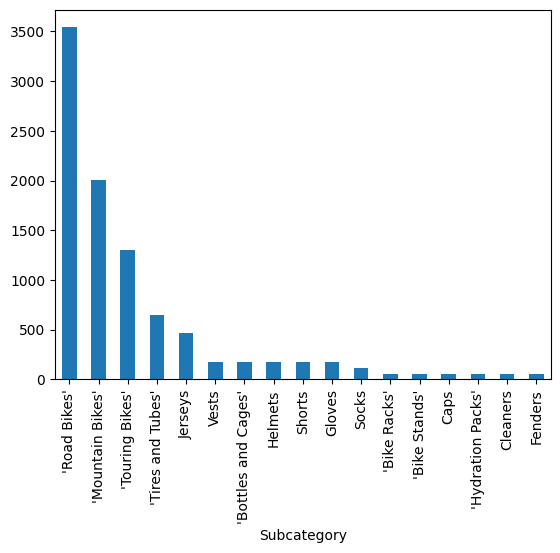

In [ ]:
data['Subcategory'].value_counts().plot(kind='bar')

<Axes: >

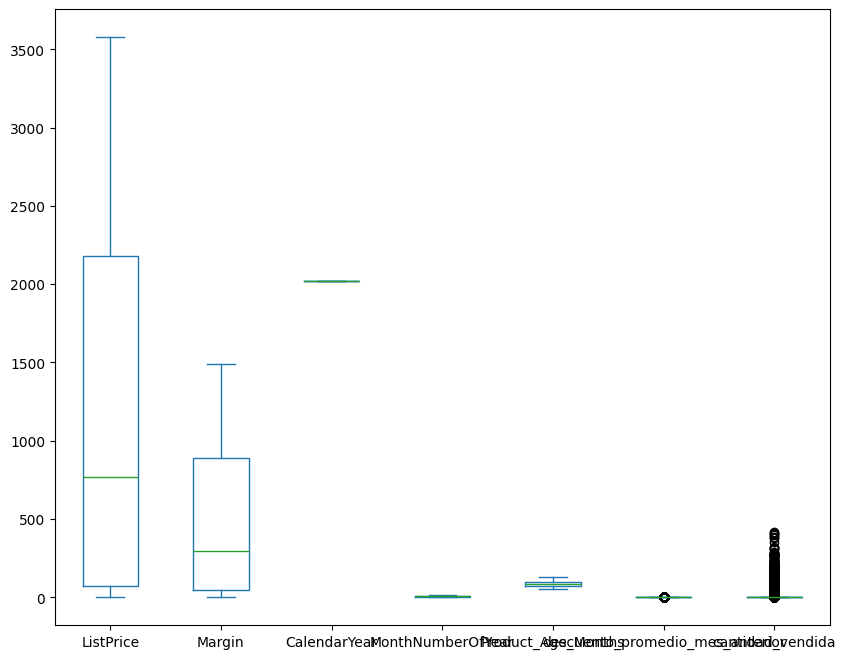

In [ ]:
data.plot(kind='box', figsize=(10,8))

In [ ]:
 #Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
variables_numericas=['ListPrice', 'Margin']
min_max_scaler.fit(data[variables_numericas]) #Ajuste de los parametros: max - min
data[variables_numericas]= min_max_scaler.transform(data[variables_numericas]) #70%
data.head()

,EnglishProductName,Category,Subcategory,ListPrice,Margin,Color,Size,CalendarYear,MonthNumberOfYear,Is_Holiday_Season,Product_Age_Months,descuento_promedio_mes_anterior,cantidad_vendida
0,'Sport-100 Helmet Red',Accessories,Helmets,0.009144,0.013771,Red,NaN,2017,8,False,49,0.0,0
1,'Sport-100 Helmet Red',Accessories,Helmets,0.009144,0.013771,Red,NaN,2017,9,False,50,0.0,0
2,'Sport-100 Helmet Red',Accessories,Helmets,0.009144,0.013771,Red,NaN,2017,10,True,51,0.0,0
3,'Sport-100 Helmet Red',Accessories,Helmets,0.009144,0.013771,Red,NaN,2017,11,True,52,0.0,0
4,'Sport-100 Helmet Red',Accessories,Helmets,0.009144,0.013771,Red,NaN,2017,12,True,53,0.0,0


In [ ]:
#Dummies para las variables predictoras
data = pd.get_dummies(data, columns=['EnglishProductName','Category','Subcategory','Color','Size'], drop_first=False)
data.head()

,ListPrice,Margin,CalendarYear,MonthNumberOfYear,Is_Holiday_Season,Product_Age_Months,descuento_promedio_mes_anterior,cantidad_vendida,EnglishProductName_'AWC Logo Cap',EnglishProductName_'All-Purpose Bike Stand',...,Size_54,Size_56,Size_58,Size_60,Size_62,Size_70,Size_L,Size_M,Size_S,Size_XL
0,0.009144,0.013771,2017,8,False,49,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.009144,0.013771,2017,9,False,50,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.009144,0.013771,2017,10,True,51,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.009144,0.013771,2017,11,True,52,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.009144,0.013771,2017,12,True,53,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


# **2.División 70-30**

<Axes: ylabel='Frequency'>

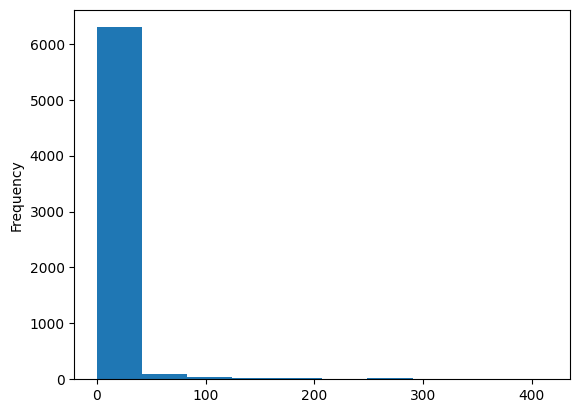

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("cantidad_vendida", axis = 1)
Y = data['cantidad_vendida']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) #En regresion no es muestreo estratificado
Y_train.plot(kind='hist')

# **3. Predictores individuales (base learners)**

In [ ]:
#Dataframe para comparar los resultados
medidas= pd.DataFrame(index=['mse','rmse','mae','mape','max'])

In [ ]:
#Arbol de clasificación
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=20, max_depth=4)
model_dt.fit(X_train, Y_train) # 70%

#Evaluación
from sklearn import metrics
Y_pred = model_dt.predict(X_test)#  30%


mse = metrics.mean_squared_error(Y_test,Y_pred) # Entre mas pequeño mejor
rmse = np.sqrt(mse) #diferencia entre el valor real y la prediccion
mae= metrics.mean_absolute_error(Y_test,Y_pred) #diferencia entre el valor real y la prediccion
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred) # error en porcentaje
max=metrics.max_error(Y_test,Y_pred)
medidas['Arbol']=[mse, rmse, mae, mape,max]
medidas


,Arbol
mse,1.895631e+02
rmse,1.376819e+01
mae,3.652970e+00
mape,8.203553e+14
max,1.910556e+02


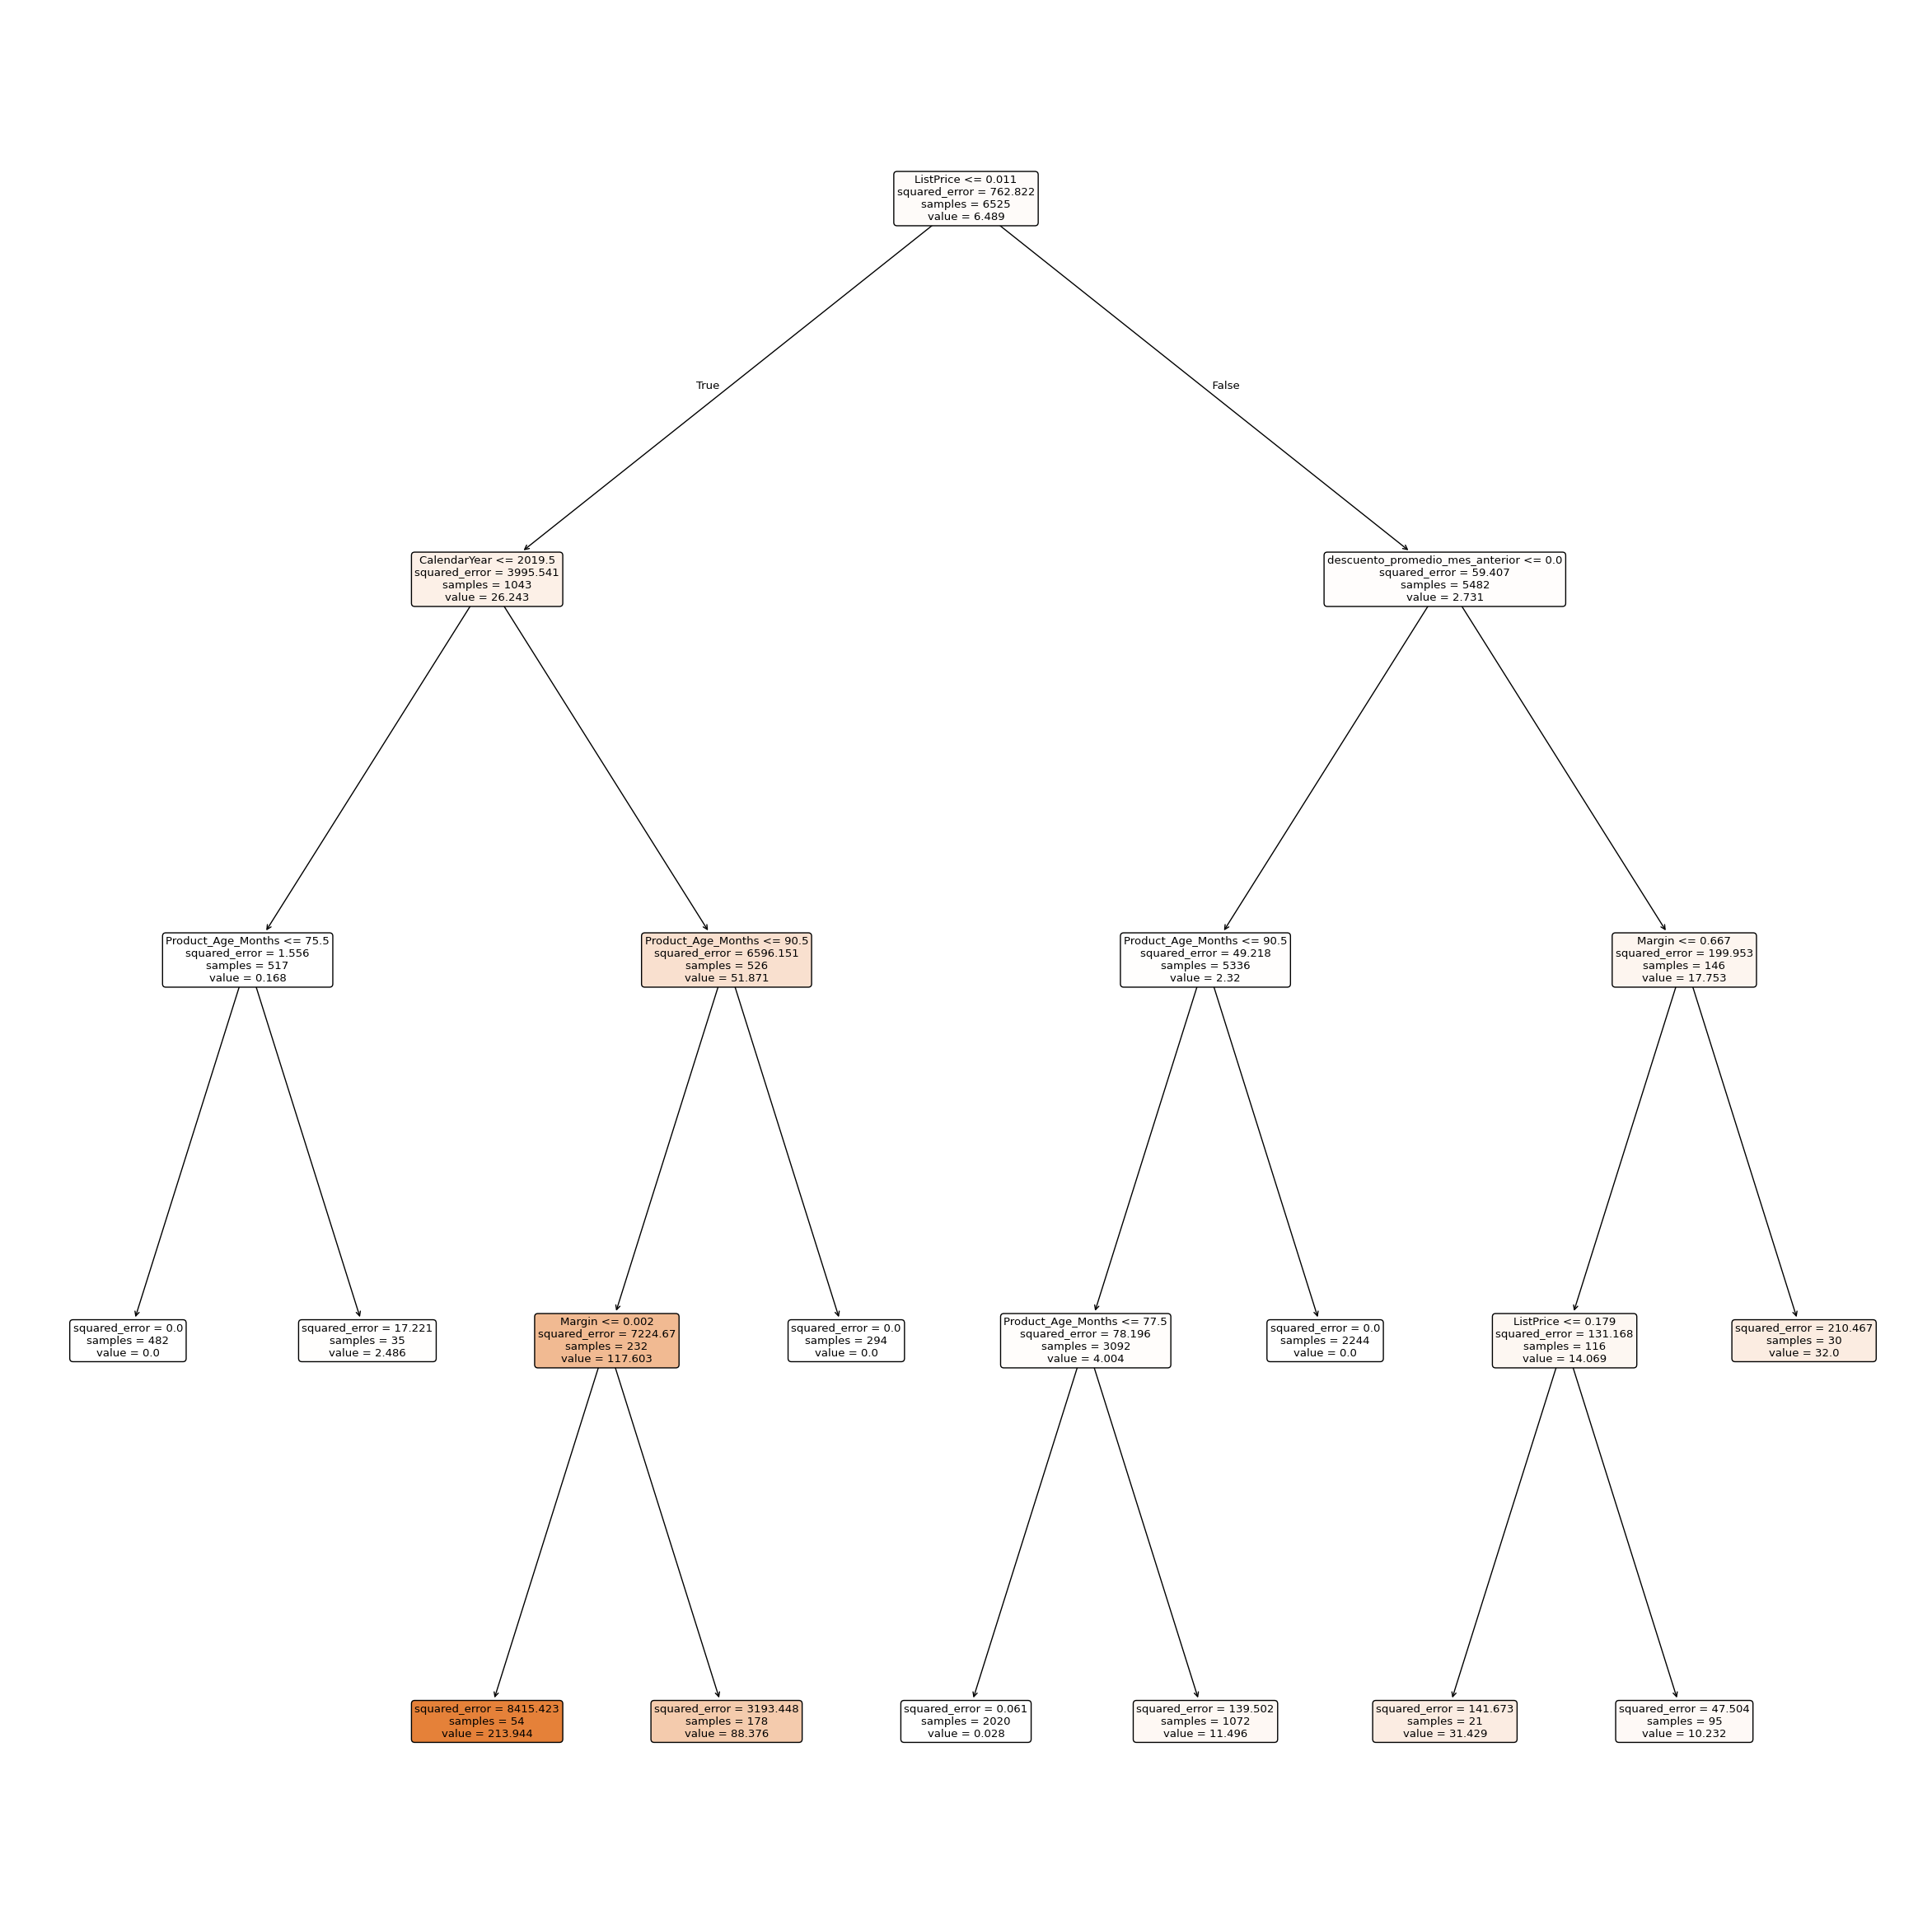

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(model_dt, feature_names=X_train.columns.values,  rounded=True, filled=True)
plt.show()

In [ ]:
model_dt.feature_names_in_

array(['ListPrice', 'Margin', 'CalendarYear', 'MonthNumberOfYear',
       'Is_Holiday_Season', 'Product_Age_Months',
       'descuento_promedio_mes_anterior',
       "EnglishProductName_'AWC Logo Cap'",
       "EnglishProductName_'All-Purpose Bike Stand'",
       "EnglishProductName_'Bike Wash - Dissolver'",
       "EnglishProductName_'Classic Vest L'",
       "EnglishProductName_'Classic Vest M'",
       "EnglishProductName_'Classic Vest S'",
       "EnglishProductName_'Fender Set - Mountain'",
       "EnglishProductName_'HL Mountain Tire'",
       "EnglishProductName_'HL Road Tire'",
       "EnglishProductName_'Half-Finger Gloves L'",
       "EnglishProductName_'Half-Finger Gloves M'",
       "EnglishProductName_'Half-Finger Gloves S'",
       "EnglishProductName_'Hitch Rack - 4-Bike'",
       "EnglishProductName_'Hydration Pack - 70 oz.'",
       "EnglishProductName_'LL Mountain Tire'",
       "EnglishProductName_'LL Road Tire'",
       "EnglishProductName_'Long-Sleeve Logo Jersey L

In [ ]:
model_dt.feature_importances_


array([0.12983185, 0.17436345, 0.18387399, 0.        , 0.        ,
       0.50300063, 0.00893008, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#Método Perezoso
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=1, metric='euclidean') #minkowski
model_knn.fit(X_train, Y_train)

#Evaluación
from sklearn import metrics
Y_pred = model_knn.predict(X_test)
mse = metrics.mean_squared_error(Y_test,Y_pred) # Entre mas pequeño mejor
rmse = np.sqrt(mse) #diferencia entre el valor real y la prediccion
mae= metrics.mean_absolute_error(Y_test,Y_pred) #diferencia entre el valor real y la prediccion
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred) # error en porcentaje
max=metrics.max_error(Y_test,Y_pred)
medidas['Knn']=[mse, rmse, mae, mape,max]
medidas




,Arbol,Knn
mse,1.895631e+02,9.380336e+01
rmse,1.376819e+01,9.685214e+00
mae,3.652970e+00,2.049339e+00
mape,8.203553e+14,3.783861e+14
max,1.910556e+02,1.750000e+02


In [ ]:
#Red neuronal
from sklearn.neural_network import MLPRegressor
model_rn = MLPRegressor(activation="logistic",hidden_layer_sizes=(10), learning_rate='adaptive',
                     learning_rate_init=0.2, momentum= 0.3, max_iter=500, verbose=False)
model_rn.fit(X_train, Y_train)

#Evaluación
Y_pred = model_rn.predict(X_test)
mse = metrics.mean_squared_error(Y_test,Y_pred) # Entre mas pequeño mejor
rmse = np.sqrt(mse) #diferencia entre el valor real y la prediccion
mae= metrics.mean_absolute_error(Y_test,Y_pred) #diferencia entre el valor real y la prediccion
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred) # error en porcentaje
max=metrics.max_error(Y_test,Y_pred)
medidas['NN']=[mse, rmse, mae, mape,max]
medidas




,Arbol,Knn,NN
mse,1.895631e+02,9.380336e+01,7.726308e+02
rmse,1.376819e+01,9.685214e+00,2.779624e+01
mae,3.652970e+00,2.049339e+00,9.998471e+00
mape,8.203553e+14,3.783861e+14,1.963029e+16
max,1.910556e+02,1.750000e+02,3.994659e+02


# 4. Bagging

In [ ]:
#Bagging: Knn
from sklearn.ensemble import BaggingRegressor
modelo_base=KNeighborsRegressor(n_neighbors=1, metric='euclidean')
model_bag = BaggingRegressor(modelo_base, n_estimators=10, max_samples=0.6)
model_bag.fit(X_train, Y_train)#70%

#Evaluación
Y_pred = model_bag.predict(X_test) #30%
mse = metrics.mean_squared_error(Y_test,Y_pred) # Entre mas pequeño mejor
rmse = np.sqrt(mse) #diferencia entre el valor real y la prediccion
mae= metrics.mean_absolute_error(Y_test,Y_pred) #diferencia entre el valor real y la prediccion
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred) # error en porcentaje
max=metrics.max_error(Y_test,Y_pred)
medidas['Bagging']=[mse, rmse, mae, mape,max]
medidas


,Arbol,Knn,NN,Bagging
mse,1.895631e+02,9.380336e+01,7.726308e+02,7.028576e+01
rmse,1.376819e+01,9.685214e+00,2.779624e+01,8.383660e+00
mae,3.652970e+00,2.049339e+00,9.998471e+00,1.855774e+00
mape,8.203553e+14,3.783861e+14,1.963029e+16,1.798542e+14
max,1.910556e+02,1.750000e+02,3.994659e+02,1.377000e+02


# 5. Random Forest (bagging)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
model_rf= RandomForestRegressor(n_estimators=100,  max_samples=0.7, criterion='squared_error',
                              max_depth=None, min_samples_leaf=2)
model_rf.fit(X_train, Y_train) #70%


#Evaluación
Y_pred = model_rf.predict(X_test) #30%
mse = metrics.mean_squared_error(Y_test,Y_pred) # Entre mas pequeño mejor
rmse = np.sqrt(mse) #diferencia entre el valor real y la prediccion
mae= metrics.mean_absolute_error(Y_test,Y_pred) #diferencia entre el valor real y la prediccion
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred) # error en porcentaje
max=metrics.max_error(Y_test,Y_pred)
medidas['Random_Forest']=[mse, rmse, mae, mape,max]
medidas


,Arbol,Knn,NN,Bagging,Random_Forest
mse,1.895631e+02,9.380336e+01,7.726308e+02,7.028576e+01,1.275801e+01
rmse,1.376819e+01,9.685214e+00,2.779624e+01,8.383660e+00,3.571836e+00
mae,3.652970e+00,2.049339e+00,9.998471e+00,1.855774e+00,9.719532e-01
mape,8.203553e+14,3.783861e+14,1.963029e+16,1.798542e+14,1.149094e+14
max,1.910556e+02,1.750000e+02,3.994659e+02,1.377000e+02,5.723767e+01


In [ ]:
# Se imprimen la importancia de las características
print('Importancia de las características')
for i, j in sorted(zip(X_train.columns, model_rf.feature_importances_)):
    print(i, j)

Importancia de las características
CalendarYear 0.15014097409951516
Category_Accessories 0.046056630108142704
Category_Bikes 5.7514247979519e-05
Category_Clothing 0.008142569185627859
Color_Black 0.00026822399728676223
Color_Blue 0.0004351960146730765
Color_Multi 0.00166871330868978
Color_Red 0.00014920645216957395
Color_Silver 0.00019298779573271888
Color_White 8.916296197657171e-05
Color_Yellow 0.0004724189206958516
EnglishProductName_'AWC Logo Cap' 0.0013584366182177812
EnglishProductName_'All-Purpose Bike Stand' 1.635860211438916e-05
EnglishProductName_'Bike Wash - Dissolver' 0.0032407921926140494
EnglishProductName_'Classic Vest L' 2.894304013945917e-06
EnglishProductName_'Classic Vest M' 2.8845726060025485e-06
EnglishProductName_'Classic Vest S' 3.2624385300757575e-06
EnglishProductName_'Fender Set - Mountain' 0.002026733434069731
EnglishProductName_'HL Mountain Tire' 0.001084590293692311
EnglishProductName_'HL Road Tire' 5.000347487136244e-05
EnglishProductName_'Half-Finger Glov

# 6. Boosting

In [ ]:
#Boosting
from sklearn.ensemble import AdaBoostRegressor
modelo_base=DecisionTreeRegressor(criterion='squared_error', max_depth=None, min_samples_leaf=2)
model_boos = AdaBoostRegressor(modelo_base, n_estimators=50)
model_boos.fit(X_train, Y_train)#70%

#Evaluación
Y_pred = model_boos.predict(X_test)#30%
mse = metrics.mean_squared_error(Y_test,Y_pred) # Entre mas pequeño mejor
rmse = np.sqrt(mse) #diferencia entre el valor real y la prediccion
mae= metrics.mean_absolute_error(Y_test,Y_pred) #diferencia entre el valor real y la prediccion
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred) # error en porcentaje
max=metrics.max_error(Y_test,Y_pred)
medidas['Boosting']=[mse, rmse, mae, mape,max]
medidas

,Arbol,Knn,NN,Bagging,Random_Forest,Boosting
mse,1.895631e+02,9.380336e+01,7.726308e+02,7.028576e+01,1.275801e+01,2.784614e+01
rmse,1.376819e+01,9.685214e+00,2.779624e+01,8.383660e+00,3.571836e+00,5.276944e+00
mae,3.652970e+00,2.049339e+00,9.998471e+00,1.855774e+00,9.719532e-01,1.165177e+00
mape,8.203553e+14,3.783861e+14,1.963029e+16,1.798542e+14,1.149094e+14,4.910968e+13
max,1.910556e+02,1.750000e+02,3.994659e+02,1.377000e+02,5.723767e+01,1.280000e+02


Librerías y Métodos nuevos de tipo boosting
* GradientBoostingRegressor (sklearn)
* Librería XGBoost
* Librería Catboost (no se crean dummies, trabaja con variables categóricas)

# 7. Votación "hard"

In [ ]:
#Votación hard
from sklearn.ensemble import VotingRegressor

regresores= [('dt', model_dt), ('knn', model_knn), ('net', model_rn)]

model_vot_hard = VotingRegressor(estimators=regresores, weights=None)
model_vot_hard.fit(X_train,Y_train) #70%

#Evaluación
Y_pred = model_vot_hard.predict(X_test)#30%
mse = metrics.mean_squared_error(Y_test,Y_pred) # Entre mas pequeño mejor
rmse = np.sqrt(mse) #diferencia entre el valor real y la prediccion
mae= metrics.mean_absolute_error(Y_test,Y_pred) #diferencia entre el valor real y la prediccion
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred) # error en porcentaje
max=metrics.max_error(Y_test,Y_pred)
medidas['Votacion_hard']=[mse, rmse, mae, mape,max]
medidas


,Arbol,Knn,NN,Bagging,Random_Forest,Boosting,Votacion_hard
mse,1.895631e+02,9.380336e+01,7.726308e+02,7.028576e+01,1.275801e+01,2.784614e+01,1.743579e+02
rmse,1.376819e+01,9.685214e+00,2.779624e+01,8.383660e+00,3.571836e+00,5.276944e+00,1.320446e+01
mae,3.652970e+00,2.049339e+00,9.998471e+00,1.855774e+00,9.719532e-01,1.165177e+00,4.464715e+00
mape,8.203553e+14,3.783861e+14,1.963029e+16,1.798542e+14,1.149094e+14,4.910968e+13,6.933424e+15
max,1.910556e+02,1.750000e+02,3.994659e+02,1.377000e+02,5.723767e+01,1.280000e+02,2.065099e+02


# 8. Votación "soft"

In [ ]:
#Votación soft

from sklearn.ensemble import VotingRegressor

regresores= [('dt', model_dt), ('knn', model_knn), ('net', model_rn)]
model_vot_soft = VotingRegressor(estimators=regresores, weights=[0.2, 0.4, 0.3])
model_vot_soft.fit(X_train,Y_train) #70%

#Evaluación
Y_pred = model_vot_soft.predict(X_test) #30%
mse = metrics.mean_squared_error(Y_test,Y_pred) # Entre mas pequeño mejor
rmse = np.sqrt(mse) #diferencia entre el valor real y la prediccion
mae= metrics.mean_absolute_error(Y_test,Y_pred) #diferencia entre el valor real y la prediccion
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred) # error en porcentaje
max=metrics.max_error(Y_test,Y_pred)
medidas['Votacion_soft']=[mse, rmse, mae, mape,max]
medidas



,Arbol,Knn,NN,Bagging,Random_Forest,Boosting,Votacion_hard,Votacion_soft
mse,1.895631e+02,9.380336e+01,7.726308e+02,7.028576e+01,1.275801e+01,2.784614e+01,1.743579e+02,1.577066e+02
rmse,1.376819e+01,9.685214e+00,2.779624e+01,8.383660e+00,3.571836e+00,5.276944e+00,1.320446e+01,1.255813e+01
mae,3.652970e+00,2.049339e+00,9.998471e+00,1.855774e+00,9.719532e-01,1.165177e+00,4.464715e+00,4.627042e+00
mape,8.203553e+14,3.783861e+14,1.963029e+16,1.798542e+14,1.149094e+14,4.910968e+13,6.933424e+15,8.496685e+15
max,1.910556e+02,1.750000e+02,3.994659e+02,1.377000e+02,5.723767e+01,1.280000e+02,2.065099e+02,1.880491e+02


# 9. Stacking

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

regresores= [('dt', model_dt), ('knn', model_knn), ('net', model_rn)]

metodo_ensamblador= LinearRegression()

#metodo_ensamblador = SVR(kernel='linear', probability=True) #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

model_stack= StackingRegressor(estimators=regresores, final_estimator=metodo_ensamblador)
model_stack.fit(X_train,Y_train)#70%

#Evaluación
Y_pred = model_stack.predict(X_test) #30%
mse = metrics.mean_squared_error(Y_test,Y_pred) # Entre mas pequeño mejor
rmse = np.sqrt(mse) #diferencia entre el valor real y la prediccion
mae= metrics.mean_absolute_error(Y_test,Y_pred) #diferencia entre el valor real y la prediccion
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred) # error en porcentaje
max=metrics.max_error(Y_test,Y_pred)
medidas['Stacking']=[mse, rmse, mae, mape,max]
medidas


,Arbol,Knn,NN,Bagging,Random_Forest,Boosting,Votacion_hard,Votacion_soft,Stacking
mse,1.895631e+02,9.380336e+01,7.726308e+02,7.028576e+01,1.275801e+01,2.784614e+01,1.743579e+02,1.577066e+02,7.969684e+01
rmse,1.376819e+01,9.685214e+00,2.779624e+01,8.383660e+00,3.571836e+00,5.276944e+00,1.320446e+01,1.255813e+01,8.927309e+00
mae,3.652970e+00,2.049339e+00,9.998471e+00,1.855774e+00,9.719532e-01,1.165177e+00,4.464715e+00,4.627042e+00,2.151467e+00
mape,8.203553e+14,3.783861e+14,1.963029e+16,1.798542e+14,1.149094e+14,4.910968e+13,6.933424e+15,8.496685e+15,7.114868e+14
max,1.910556e+02,1.750000e+02,3.994659e+02,1.377000e+02,5.723767e+01,1.280000e+02,2.065099e+02,1.880491e+02,1.554188e+02


# **10. Guardamos el mejor modelo**

In [ ]:
import pickle
filename = 'modelo-ensamble-reg.pkl'
variables=X.columns._values
pickle.dump([model_stack,variables, min_max_scaler], open(filename, 'wb'))

